# ¡Hola, Jaime!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Descripción del proyecto


## Contexto

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 
Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Inicialización

A continuación cargaré las librerias necesarias para el desarrollo del proyecto.

In [1]:
## Importación de librerias

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

## Cargar datos

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
orders     = pd.read_csv('/datasets/orders_us.csv')
visits     = pd.read_csv('/datasets/visits_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo importando los datos y las librerías.
</div>


## Análisis exploratorio de los datos

Comenzaré explorando los datasets 'hypotheses', 'visits'y 'orders' para obtener una comprensión inicial de los datos y, si es necesario, realizar correcciones o ajustes para garantizar que estén en un formato adecuado para el análisis.

In [3]:
# hypotheses

hypotheses.info()
display(hypotheses.describe())
hypotheses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


,Hypothesis;Reach;Impact;Confidence;Effort
count,9
unique,9
top,Change the background color on the main page. ...
freq,1


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


El dataset de hipótesis tiene datos que están combinados en una sola columna con los campos separados por punto y coma (;). Para poder analizar y trabajar con estos datos, es necesario separar esta columna en varias columnas correspondientes a cada variable: Hypothesis, Reach, Impact, Confidence y Effort.

In [4]:
# orders

orders.info()
display(orders.describe())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


El dataset de 'orders' contiene 1197 registros y 5 columnas: transactionId, visitorId, date, revenue y group.
Es necesario convertir la columna 'date' al tipo de dato fecha.

In [5]:
# Visits

visits.info()
display(visits.describe())
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


El dataset de visits contiene 62 registros y 3 columnas: 'date','group','visits'.
Es necesario modificar el tipo de datos de la columna 'date' a fecha ya que se encuentra como tipo object.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta exploración inicial de los datos.
</div>


### Separación de columnas en 'hypotheses'

In [6]:
# Creas columnas separadas dividiendo la columna original por ';'
hypotheses[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']] = hypotheses['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)

# Eliminas la columna original que contenía todos los datos combinados
hypotheses.drop('Hypothesis;Reach;Impact;Confidence;Effort', axis=1, inplace=True)
hypotheses.columns = map(str.lower, hypotheses.columns)
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Modificando nombre de columnas en 'orders'

In [7]:
# Renombrar las columnas 'transactionId','visitorId'
orders = orders.rename(columns={
    'transactionId': 'transaction_id',
    'visitorId': 'visitor_id'
})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

### Modificando tipo de datos en datasets 'orders' , 'visits', 'hypotheses'

In [8]:
# Convertir la columna 'date' en 'orders' al tipo de dato datetime
orders['date'] = pd.to_datetime(orders['date'])
orders.dtypes

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                  float64
group                     object
dtype: object

In [9]:
# Convertir la columna 'date' en 'visits' al tipo de dato datetime
visits['date'] = pd.to_datetime(visits['date'])
visits.dtypes

date      datetime64[ns]
group             object
visits             int64
dtype: object

In [10]:
# Convertir las columnas de 'hypotheses' a tipos numéricos
hypotheses['reach'] = pd.to_numeric(hypotheses['reach'])
hypotheses['impact'] = pd.to_numeric(hypotheses['impact'])
hypotheses['confidence'] = pd.to_numeric(hypotheses['confidence'])
hypotheses['effort'] = pd.to_numeric(hypotheses['effort'])


### Verificación de duplicados

Verifiquemos las tablas de 'orders' y 'visits', para eliminar la posibilidad de que algunos visitantes puedan haber accedido a ambos grupos (A y B).

In [11]:
visitors_count = orders.groupby('visitor_id')['group'].nunique()

# Filtrar los visitantes que están en más de un grupo
duplicated_visitors = visitors_count[visitors_count > 1]
display(duplicated_visitors.sum())
duplicated_visitors.head()

116

visitor_id
8300375      2
199603092    2
232979603    2
237748145    2
276558944    2
Name: group, dtype: int64

Como resultado obtuvimos 116 duplicados, Lo que indica que hay visitantes que aparecen en ambos grupos (A y B) debido a que tienen más de un grupo único asociado a su visitor_id. 

In [12]:
# Filtrar las filas con los visitor_id identificados en ambos grupos
dup_visitors = orders[orders['visitor_id'].isin(duplicated_visitors.index)]
dup_visitors

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
20,2904772834,963407295,2019-08-15,5.6,B
23,4252514150,351125977,2019-08-15,235.6,B
24,1162046357,3234906277,2019-08-15,120.2,B
26,2223239646,199603092,2019-08-15,55.7,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,20.8,B
1183,1458356232,963407295,2019-08-14,80.0,A
1184,1329499668,2949041841,2019-08-14,160.7,B
1189,4082620617,393266494,2019-08-14,490.4,B


In [13]:
# Filtrar las filas con visitantes duplicados y eliminarlos
orders = orders[~orders['visitor_id'].isin(duplicated_visitors.index)]
duplicated_visitors.sum()

116

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta limpieza de duplicados.
</div>


## Priorizar hipótesis

### Aplicar el framework ICE para priorizar hipótesis

In [14]:
hypotheses


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [15]:
# Aplicando framework ICE 
hypotheses['ICE'] = ((hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort'])
print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE',ascending=False))


                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000



Las hipótesis principales con los valores más altos de ICE son:
"Launch a promotion that gives users discounts" (8)  con un valor de ICE de 16.20. y 
"Add two new channels for attracting traffic" (0) con un valor de ICE de 13.33.

### Aplicar el framework RICE para priorizar hipótesis

In [16]:
# Aplicando framework RICE

hypotheses['RICE'] = ((hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort'])
print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE',ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Los resultados calculados usando RICE proporcionan una nueva perspectiva sobre la priorización de las hipótesis en comparación con el marco ICE:

"Add a subscription form to all the main pages"(7) tiene el mayor valor de RICE, con un puntaje de 112.0. seguido de "Add product recommendation blocks to the store" (2) con el puntaje de 56.0.

Comparando con el marco ICE, notamos que las posiciones de prioridad entre las hipótesis cambian significativamente. Algunas hipótesis se mantienen en posiciones de alta prioridad, como "Add a subscription form to all the main pages" (7), mientras que otras se desplazan hacia posiciones más bajas. 

Al comparar la priorización basada en RICE y ICE, es importante resaltar los cambios en la clasificación de las hipótesis. RICE y ICE son métodos de priorización similares, pero RICE introduce el factor de alcance, que puede alterar significativamente el orden de prioridad.
Vemos en la hipótesis "Add a subscription form to all the main pages"(7) tiene el valor mas alto en RICE debido a que su parámetro 'Reach' es 10 miestras que las otras hipótesis tienen valores mas bajos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Puedes complementar este análisis con un análisis gráfico. Por ejemplo, un diagrama de dispersión para observar el comportamiento de los puntajes según los frameworks.
</div>


## Análisis de test A/B

### Ingreso acumulado por grupo

#### Recopilar datos acumulados

In [17]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {'date' : 'max',
         'group' : 'max',
         'transaction_id' : pd.Series.nunique, 
         'visitor_id' : pd.Series.nunique, 
         'revenue' : 'sum',
        }
    ), 
    axis=1,
).sort_values(by=['date','group'])

visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]

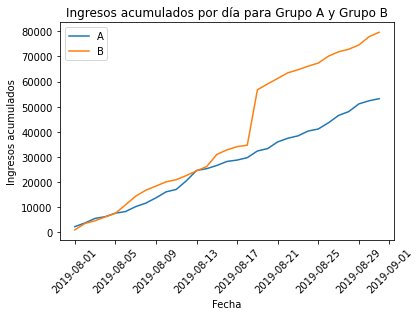

In [18]:
# Pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)  
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')
plt.title('Ingresos acumulados por día para Grupo A y Grupo B')

plt.show()

Los ingresos aumentan constantemente durante toda la prueba. Los ingresos aumentan constantemente durante toda la prueba.
Sin embargo, podemos ver que ambos grupos tienen picos en los ingresos en ciertos puntos. Esto puede implicar un aumento en el número de pedidos o la existencia de pedidos muy caros en la muestra. Aprenderás a analizar tales valores atípicos en la próxima lección.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### Tamaño de pedido promedio acumulado por grupo

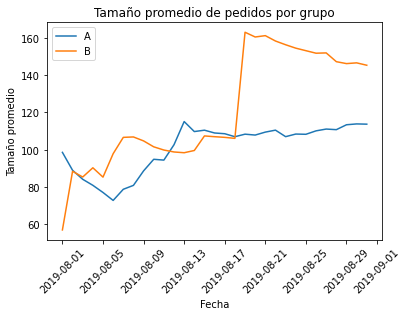

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)  
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio')
plt.title('Tamaño promedio de pedidos por grupo')

plt.show()

El tamaño de compra promedio también se estabiliza al final de la prueba: se estabiliza para el grupo A y sigue cayendo para el grupo B. Necesitamos más datos sobre este grupo para encontrar el verdadero tamaño promedio de compra y establecer su nivel.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho.
</div>


###  Representación gráficamente de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

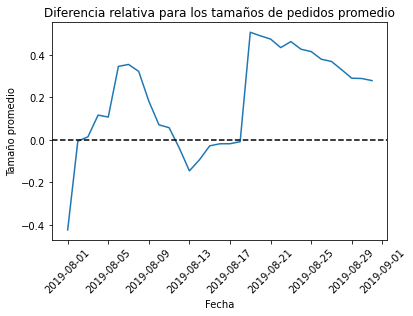

In [20]:
# reunir los datos en un DataFrame
cumulativerevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(cumulativerevenue['date'], (cumulativerevenue['revenueB']/cumulativerevenue['ordersB'])/(cumulativerevenue['revenueA']/cumulativerevenue['ordersA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)  
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio')
plt.title('Diferencia relativa para los tamaños de pedidos promedio')

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente.
</div>


En varios puntos, la diferencia entre los segmentos aumenta. Esto significa que deben haber algunos pedidos grandes y valores atípicos. cambios considerables, compras anormalmente grandes.

### Tasas de conversión diarias de los dos grupos 

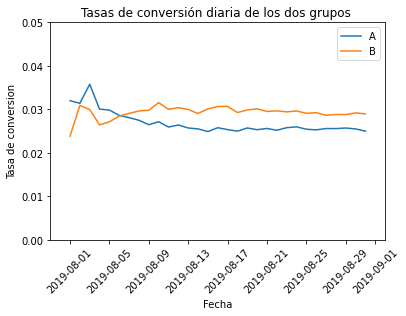

In [21]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# establecer la escala de los ejes
plt.axis([pd.to_datetime('2019-07-30'), pd.to_datetime('2019-09-02'), 0, 0.05])
plt.xticks(rotation=45)  
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversion')
plt.title('Tasas de conversión diaria de los dos grupos ')

plt.show()

Al inicio de la prueba, el segmento A tenia una tasa de conversion mas alta pero el segmento B gano gradualmente y se estabilizo en un valor casi constante

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con este análisis.
</div>


### Gráfico de dispersión del número de pedidos por usuario

In [22]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [23]:
ordersbyUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersbyUsers.columns = ['visitor_id', 'orders']

print(ordersbyUsers.sort_values(by='orders', ascending=False).head(10))

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Hay clientes con 2, 3 pedidos lo que parece normal para adquirir en una semana.

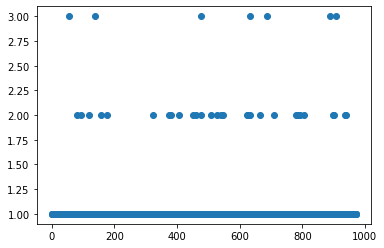

In [24]:
x_values = pd.Series(range(0,len(ordersbyUsers)))
plt.scatter(x_values,ordersbyUsers['orders'])

Se observa en gráfico de dispersión que la mayoría de los clientes hicieron un solo pedido. Sin embargo, una parte significativa hizo de dos  y tres.

### Calcular los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía

In [25]:
print(np.percentile(ordersbyUsers['orders'], [95, 99]))

[1. 2.]


En la distribución del número de pedidos por usuario, los percentiles calculados son 1 y 2 para el percentil 95 y 99, respectivamente.

Lo que indica:

El 95% de los usuarios realizaron 1 pedido o menos.
1% de los usuarios hicieron 2 pedidos o mas.
Por lo tanto, se puede considerar que los usuarios que superan estos valores (2 pedidos en este caso) podrían clasificarse como anomalías.

### Gráfico de dispersión de los precios de los pedidos.

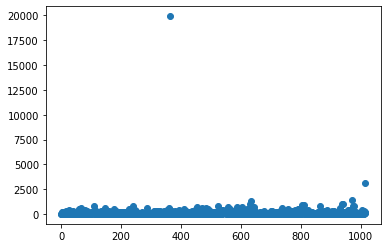

In [26]:
x_values2 = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values2,orders['revenue'])

La mayoría de pedidos cuestan menos 2000, se evidencias valores atípicos superiores 2500 y uno bastante anormal de 20.000

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía

In [27]:
print(np.percentile(orders['revenue'], [95, 99])) 

[414.275 830.3  ]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Has identificado en cambos casos, los datos extremos correctamente.
</div>



El cálculo de los percentiles 95 y 99 para los precios de los pedidos muestra que:

El percentil 95 para los precios de los pedidos es de 414.275.
El percentil 99 para los precios de los pedidos es de 830.3.
Lo que muestra:

El 95% de los precios de los pedidos son de 414.275 o menos.
El 1% de los precios de los pedidos son de 830.3 o mas.
Se considerarían anomalías a los pedidos con precios que superen el valor de 830.3, ya que estos estarían más allá del 99% de los datos restantes. 

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

Para hallar la significancia estadística de la diferencia en la conversión entre los grupos A y B utilizando los datos en bruto es necesario un test de Mann-Whitney U.

In [28]:
# Calculemos la significancia estadística de la diferencia de conversión entre los grupos

ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.01102
0.160


Los resultados son los siguientes:
* Valor p: El valor p obtenido del test  es de aproximadamente 0.01102. Este valor es menor que el nivel de significancia común de 0.05, lo que sugiere que existe una diferencia estadísticamente significativa en la conversión entre los grupos A y B.

* Ganancia de conversion relativa: El aumento relativo del grupo B en comparación con el grupo A es del 16%. Esto se calcula a partir de la diferencia en la media de las conversiones de los grupos A y B.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

Para este análisis se realizará un test de Mann-Whitney U para determinar la significancia estadística de la diferencia en el tamaño promedio del pedido entre los grupos A y B utilizando los datos en bruto.

In [29]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


Según el análisis se evidencia que:

* Valor p: El valor p es de 0.862, valor significativamente mayor que el nivel de significancia común de 0.05, lo que indica que no hay una diferencia estadísticamente significativa en el tamaño promedio del pedido entre los grupos A y B utilizando los datos en bruto.

* Ganancia de conversión relativa: El grupo B muestra un aumento relativo del 27.8% en comparación con el grupo A en cuanto al tamaño promedio del pedido. Sin embargo, este aumento no es estadísticamente significativo según el valor p obtenido (86%).

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

In [30]:
Outliners_visits = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)
Outliners_orders = orders[orders['revenue'] > 830]['visitor_id']
abnormalUsers = pd.concat([Outliners_visits, Outliners_orders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099     148427295
58       611059232
949      887908475
744      888512513
1103    1164614297
Name: visitor_id, dtype: int64
(17,)


Se identificó 17 clientes con compras atípicas.

In [31]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.005
0.205


Dado que el valor p obtenido es menor que el nivel de significancia común (0.05) indica que al eliminar a los usuarios con compras atípicas, todavía existe una diferencia estadísticamente significativa en la conversión entre los grupos A y B,  con el grupo B mostrando un aumento del 20.5% en la conversión en comparación con el grupo A. 

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [32]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.917
-0.010


* El valor p obtenido del test es de 0.917. Este valor es significativamente mayor que el nivel de significancia común de 0.05, lo que indica que no hay una diferencia estadísticamente significativa en el tamaño promedio del pedido entre los grupos A y B una vez que se han excluido los usuarios anómalos.

* La ganancia relativa del tamaño promedio del pedido entre los grupos A y B es de -0.010% una vez que se han excluido los usuarios anómalos. Sin embargo, esta diferencia no es estadísticamente significativa según el valor p obtenido.

Estos resultados indican que, al eliminar a los usuarios atípicos, no existe una diferencia estadísticamente significativa en el tamaño promedio del pedido entre los grupos A y B. A pesar de que hay una ligera disminución en el tamaño promedio del pedido en el grupo B, esta disminución no es estadísticamente significativa.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Para cada una de las pruebas de hipótesis, establece la hipótesis nula y la hipótesis alternativa.
</div>


## Conclusión de la prueba

Basándome en los resultados obtenidos en los análisis de la diferencia en la conversión y en el tamaño promedio del pedido entre los grupos A y B:

1. Conversión entre grupos: Existe una diferencia estadísticamente significativa en la conversión entre los grupos A y B. Incluso después de filtrar a los usuarios atípicos, el grupo B mantiene un aumento del 20.5% en la conversión en comparación con el grupo A.

2. Tamaño promedio del pedido: Después de excluir a los usuarios atípicos, no hay una diferencia estadísticamente significativa en el tamaño promedio del pedido entre los grupos. Aunque se observa una ligera disminución del 0.01% en el grupo B en comparación con el grupo A, esta variación no es estadísticamente significativa.

La decisión basada en estos resultados es considerar al grupo B como líder en términos de conversión. Por otro lado, para el tamaño promedio del pedido, se podría concluir que no hay diferencias significativas entre los grupos.

<div class="alert alert-block alert-success">
    
# Comentarios generales 
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, Cece. Nos queda únicamente un elemento por corregir y estaremos listos para aprobar tu proyecto.
</div>
